In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
from scipy import misc

import imageio
from PIL import Image
from sklearn.preprocessing import OneHotEncoder
# import pillow
import categories
import helper_function

import importlib

In [6]:
"""
输入：
含有image_id 和 category 的数组 和 坐标
"""
all_columns = np.array( ['neckline_left', 'neckline_right',\
       'center_front', 'shoulder_left', 'shoulder_right', 'armpit_left',\
       'armpit_right', 'waistline_left', 'waistline_right', 'cuff_left_in',\
       'cuff_left_out', 'cuff_right_in', 'cuff_right_out', 'top_hem_left',\
       'top_hem_right', 'waistband_left', 'waistband_right', 'hemline_left',\
       'hemline_right', 'crotch', 'bottom_left_in', 'bottom_left_out',\
       'bottom_right_in', 'bottom_right_out'] )

blouse_columns = np.array( [ 'neckline_left', 'neckline_right',\
       'center_front', 'shoulder_left', 'shoulder_right', 'armpit_left',\
       'armpit_right',  'cuff_left_in', 'cuff_left_out', 'cuff_right_in', 'cuff_right_out', 'top_hem_left',\
       'top_hem_right'] )

outwear_columns =  np.array( ['neckline_left', 'neckline_right',\
     'shoulder_left', 'shoulder_right', 'armpit_left',\
       'armpit_right', 'waistline_left', 'waistline_right', 'cuff_left_in',\
       'cuff_left_out', 'cuff_right_in', 'cuff_right_out', 'top_hem_left',\
       'top_hem_right'] )

trousers_columns = np.array( [ 'waistband_left', 'waistband_right',  'crotch', 'bottom_left_in', 'bottom_left_out',\
       'bottom_right_in', 'bottom_right_out'] )

skirt_columns = np.array( [ 'waistband_left', 'waistband_right',  'hemline_left', 'hemline_right'] )

dress_columns = np.array( ['neckline_left', 'neckline_right',\
       'center_front', 'shoulder_left', 'shoulder_right', 'armpit_left',\
       'armpit_right', 'waistline_left', 'waistline_right', 'cuff_left_in',\
       'cuff_left_out', 'cuff_right_in', 'cuff_right_out', 'hemline_left',\
       'hemline_right'] )

print(blouse_columns.shape,outwear_columns.shape,trousers_columns.shape,skirt_columns.shape,dress_columns.shape)

(13,) (14,) (7,) (4,) (15,)


In [3]:
"""
输入：5个 csv文件 分别为各个类别的文件

    文件：image_id image_cate 以及该类型所有的landmarks的 x, y 和 vis

循环5个category

"""
data_origin_test = pd.read_csv("test/test.csv")
origin_cols = data_origin_test.image_category.unique()

input_dir = "output/tmp/"
output_dir = "output/"

output_file = output_dir + "result_mean.csv"

cates = ["blouse" ,"outwear","trousers","skirt","dress" ]

all_data = []
for cate in origin_cols:
    
    input_file =input_dir+ "test_"+cate+"_coord.csv"
    data_coord = pd.read_csv(input_file)

    output_data = data_coord.iloc[:,:2]
    output_data.columns = ['image_id', 'image_category']
    
    #选择适合的 衣服类型
    cate_cols = categories.get_columns(cate)
    #if blouse
    cnt=2
    interval=3
    for col in all_columns:
        if col not in cate_cols:
            output_data[col] = '-1_-1_-1'
        else:
            coords = data_coord.iloc[:,cnt:cnt+interval].as_matrix()

            vstr = np.vectorize(str)
            coords = vstr(coords)
            
            output_data[col] = ["_".join(item) for item in coords]
            cnt+=interval

    all_data.append(output_data)
    
output_all = pd.concat(all_data,ignore_index=True)
output_all.to_csv(output_file , index  = False)





FileNotFoundError: File b'output/tmp/test_blouse_coord.csv' does not exist

In [12]:
input_file =input_dir+ "vgg_pd.csv"
data_coord = pd.read_csv(input_file)

output_data = data_coord.iloc[:,:2]
output_data.columns = ['image_id', 'image_category']

#选择适合的 衣服类型
cate_cols = categories.get_columns("skirt")
#if blouse
cnt=2
interval=3
for col in all_columns:
    if col not in cate_cols:
        output_data[col] = '-1_-1_-1'
    else:
        
        coords = data_coord.iloc[:,cnt:cnt+interval].as_matrix()

        vstr = np.vectorize(str)
        coords = vstr(coords)
        
        output_data[col] = ["_".join(item) for item in coords]
        print(output_data[col])
        cnt+=interval

all_data.append(output_data)
    
output_all = pd.concat(all_data,ignore_index=True)
output_all.to_csv(output_file , index  = False)

0      67.0_75.0_1.0
1     173.0_64.0_1.0
2    144.0_134.0_1.0
3    151.0_185.0_1.0
4    150.0_136.0_1.0
5     195.0_48.0_1.0
6    157.0_167.0_1.0
7    137.0_147.0_1.0
8    159.0_105.0_1.0
9    154.0_174.0_1.0
Name: waistband_left, dtype: object
0      143.0_7.0_1.0
1     225.0_66.0_1.0
2    195.0_125.0_1.0
3    211.0_183.0_1.0
4    213.0_145.0_1.0
5     296.0_45.0_1.0
6    247.0_194.0_1.0
7    176.0_169.0_1.0
8    231.0_110.0_1.0
9    205.0_174.0_1.0
Name: waistband_right, dtype: object
0    155.0_251.0_1.0
1    121.0_191.0_1.0
2    119.0_264.0_1.0
3    128.0_385.0_1.0
4    125.0_262.0_1.0
5    188.0_223.0_1.0
6     97.0_378.0_1.0
7    111.0_359.0_1.0
8    150.0_266.0_1.0
9    134.0_263.0_1.0
Name: hemline_left, dtype: object
0    297.0_243.0_1.0
1    245.0_218.0_1.0
2    205.0_269.0_1.0
3    182.0_329.0_1.0
4    206.0_283.0_1.0
5    327.0_200.0_1.0
6    214.0_386.0_1.0
7    194.0_382.0_1.0
8    243.0_271.0_1.0
9    228.0_256.0_1.0
Name: hemline_right, dtype: object


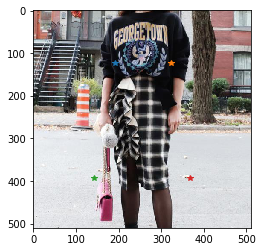

In [23]:
importlib.reload(helper_function)
helper_function.show_im_lms(output_all,2000,1 , "test/")

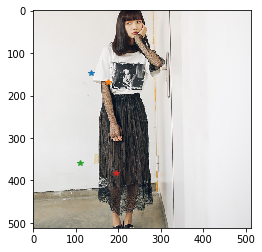

In [24]:
a = pd.read_csv("train_pad/Annotations/skirt_vgg_result.csv")
helper_function.show_im_lms(a,7,1 , "train_pad/")